In [163]:
pip install tensorflow_addons

     -------------------------------------- 742.5/742.5 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing neccessary modules.
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
import tensorflow_addons as tfa


In [37]:
# Reading data frame and removing generic words that do not help prediction like a , the, is . etc.
df = pd.read_csv("new_train.csv")
df["transcription"] = df["transcription"].str.lower()
df["transcription"] = df["transcription"].str.replace(' a '," ")
df["transcription"] = df["transcription"].str.replace(r'\n'," ")

df["transcription"] = df["transcription"].str.replace(' and '," ")
df["transcription"] = df["transcription"].str.replace(' of '," ")
df["transcription"] = df["transcription"].str.replace(' for '," ")
df["transcription"] = df["transcription"].str.replace('[\,\.\:]'," ")
df["transcription"] = df["transcription"].str.replace(' the '," ")
df["transcription"] = df["transcription"].str.replace(' in '," ")
df["transcription"] = df["transcription"].str.replace(' on '," ")
df["transcription"] = df["transcription"].str.replace(' that '," ")
df["transcription"] = df["transcription"].str.replace(' i '," ")
df["transcription"] = df["transcription"].str.replace(' as '," ")
df["transcription"] = df["transcription"].str.replace(' an '," ")
df["transcription"] = df["transcription"].str.replace(' to '," ")
df["transcription"] = df["transcription"].str.replace(' it '," ")
df["transcription"] = df["transcription"].str.replace(' be '," ")
df["transcription"] = df["transcription"].str.replace(' is '," ")
df["transcription"] = df["transcription"].str.replace(' was '," ")
df["transcription"] = df["transcription"].str.replace(' with '," ")
df["transcription"] = df["transcription"].str.replace(' at '," ")
df["transcription"] = df["transcription"].str.replace(' its '," ")
df["transcription"] = df["transcription"].str.replace(' this '," ")
df["transcription"] = df["transcription"].str.replace(' were '," ")
df["transcription"] = df["transcription"].str.replace(' which '," ")
df["transcription"] = df["transcription"].str.replace(' then '," ")
df["transcription"] = df["transcription"].str.replace(' there '," ")
df["transcription"] = df["transcription"].str.replace(' from '," ")
df["transcription"] = df["transcription"].str.replace(' we '," ")
df["transcription"] = df["transcription"].str.replace(' has '," ")
df["transcription"] = df["transcription"].str.replace(' had '," ")
df["transcription"] = df["transcription"].str.replace(' have '," ")
df["transcription"] = df["transcription"].str.replace(' been '," ")
df["transcription"] = df["transcription"].str.replace(' he '," ")
df["transcription"] = df["transcription"].str.replace(' she '," ")
df["transcription"] = df["transcription"].str.replace(' made '," ")
df["transcription"] = df["transcription"].str.replace(' use '," ")
df["transcription"] = df["transcription"].str.replace(' using '," ")
df["transcription"] = df["transcription"].str.replace(' also '," ")
df["transcription"] = df["transcription"].str.replace(' used '," ")
df["transcription"] = df["transcription"].str.replace(' his '," ")
df["transcription"] = df["transcription"].str.replace(' her '," ")
df["transcription"] = df["transcription"].str.replace(' he '," ")
df["transcription"] = df["transcription"].str.replace(' she '," ")
df["transcription"] = df["transcription"].str.replace('ing',"")
df["transcription"] = df["transcription"].str.replace(' patient '," ")
df["transcription"] = df["transcription"].str.replace(' they '," ")
df["transcription"] = df["transcription"].str.replace(' are '," ")
med_spec = np.array(df["medical_specialty"])
sentences = np.array(df["transcription"])
#sentences = list(map(lambda x: x.lower(), sentences ))
labels = np.array(df["labels"])

C:\Users\Karthik\AppData\Local\Temp\ipykernel_203164\884965574.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["transcription"] = df["transcription"].str.replace(r'\n'," ")
C:\Users\Karthik\AppData\Local\Temp\ipykernel_203164\884965574.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df["transcription"] = df["transcription"].str.replace('[\,\.\:]'," ")


In [27]:
# Some basic data analysis taking into accoutn frequency of words in labels 0 and 1.
df0 = df[df['labels'] == 0]
df1 = df[df['labels'] == 1]
s = ""
for i in range(len(df0)):
    s+=df0["transcription"].iloc[i].lower()
freq1 = Counter(s.split()).most_common()
s= ""
for i in range(len(df1)):
    s+=df1["transcription"].iloc[i].lower()
freq2 = Counter(s.split()).most_common()

freq2

[('the', 9223),
 ('left', 2601),
 ('procedure', 2568),
 ('right', 2567),
 ('placed', 2373),
 ('a', 1733),
 ('1', 1313),
 ('anesthesia', 1299),
 ('into', 1297),
 ('well', 1290),
 ('removed', 1261),
 ('incision', 1255),
 ('no', 1239),
 ('2', 1190),
 ('performed', 1179),
 ('after', 1150),
 ('this', 954),
 ('diagnosis', 953),
 ('there', 945),
 ('room', 943),
 ('skin', 934),
 ('artery', 914),
 ('through', 906),
 ('taken', 905),
 ('fashion', 898),
 ('noted', 887),
 ('position', 872),
 ('all', 843),
 ('by', 836),
 ('anterior', 834),
 ('closed', 789),
 ('vicryl', 758),
 ('postoperative', 751),
 ('operat', 740),
 ('3', 735),
 ('preoperative', 733),
 ('general', 714),
 ('suture', 711),
 ('area', 709),
 ('5', 671),
 ('catheter', 660),
 ('sterile', 658),
 ('normal', 655),
 ('prepped', 647),
 ('down', 634),
 ('draped', 626),
 ('she', 599),
 ('obtained', 596),
 ('i', 596),
 ('tissue', 595),
 ('lateral', 593),
 ('blood', 588),
 ('posterior', 581),
 ('over', 563),
 ('condition', 559),
 ('cm', 558),
 (

In [28]:
list(filter(lambda x : x[1] > 500,freq1))

[('no', 647), ('the', 526)]

In [29]:
vocab_size = 10000
embedding_dim = 16
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 3175

In [30]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [31]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [32]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(100 , activation = 'relu'),
    tf.keras.layers.Dense(40, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics= ['accuracy'])

In [34]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 16)          160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1000)              17000     
                                                                 
 dense_4 (Dense)             (None, 100)               100100    
                                                                 
 dense_5 (Dense)             (None, 40)                4040      
                                                                 
Total params: 281,140
Trainable params: 281,140
Non-trainable params: 0
________________________________________________

In [35]:
num_epochs = 5
history = model.fit(x = training_padded, y = training_labels, epochs=num_epochs,validation_data=(testing_padded,testing_labels) , verbose=2)

Epoch 1/5
100/100 - 2s - loss: 3.1484 - accuracy: 0.2154 - val_loss: 2.9390 - val_accuracy: 0.2116 - 2s/epoch - 24ms/step
Epoch 2/5
100/100 - 2s - loss: 2.9305 - accuracy: 0.2189 - val_loss: 2.9146 - val_accuracy: 0.2116 - 2s/epoch - 15ms/step
Epoch 3/5
100/100 - 1s - loss: 2.8609 - accuracy: 0.2416 - val_loss: 2.7771 - val_accuracy: 0.3010 - 1s/epoch - 14ms/step
Epoch 4/5
100/100 - 1s - loss: 2.6448 - accuracy: 0.3200 - val_loss: 2.6431 - val_accuracy: 0.3048 - 1s/epoch - 13ms/step
Epoch 5/5
100/100 - 1s - loss: 2.5471 - accuracy: 0.3254 - val_loss: 2.6092 - val_accuracy: 0.3212 - 1s/epoch - 13ms/step


In [400]:
model.evaluate(testing_padded,testing_labels)[1]

25/25 [==============================] - 0s 8ms/step - loss: 2.5755 - accuracy: 0.3287


0.32871535420417786

In [43]:
dft = pd.read_csv("new_test.csv")
dft["transcription"] = dft["transcription"].str.lower()
dft["transcription"] = dft["transcription"].str.replace(' a '," ")
dft["transcription"] = dft["transcription"].str.replace(' and '," ")
dft["transcription"] = dft["transcription"].str.replace(' of '," ")
dft["transcription"] = dft["transcription"].str.replace(' for '," ")
dft["transcription"] = dft["transcription"].str.replace('[\,\.\:]'," ")
dft["transcription"] = dft["transcription"].str.replace(' the '," ")
dft["transcription"] = dft["transcription"].str.replace(' in '," ")
dft["transcription"] = dft["transcription"].str.replace(' on '," ")
dft["transcription"] = dft["transcription"].str.replace(' that '," ")
dft["transcription"] = dft["transcription"].str.replace(' i '," ")
dft["transcription"] = dft["transcription"].str.replace(' as '," ")
dft["transcription"] = dft["transcription"].str.replace(' an '," ")
dft["transcription"] = dft["transcription"].str.replace(' to '," ")
dft["transcription"] = dft["transcription"].str.replace(' it '," ")
dft["transcription"] = dft["transcription"].str.replace(' be '," ")
dft["transcription"] = dft["transcription"].str.replace(' is '," ")
dft["transcription"] = dft["transcription"].str.replace(' was '," ")
dft["transcription"] = dft["transcription"].str.replace(' with '," ")
dft["transcription"] = dft["transcription"].str.replace(' at '," ")
dft["transcription"] = dft["transcription"].str.replace(' its '," ")
dft["transcription"] = dft["transcription"].str.replace(' this '," ")
dft["transcription"] = dft["transcription"].str.replace(' were '," ")
dft["transcription"] = dft["transcription"].str.replace(' which '," ")
dft["transcription"] = dft["transcription"].str.replace(' then '," ")
dft["transcription"] = dft["transcription"].str.replace(' there '," ")
dft["transcription"] = dft["transcription"].str.replace(' from '," ")
dft["transcription"] = dft["transcription"].str.replace(' we '," ")
dft["transcription"] = dft["transcription"].str.replace(' has '," ")
dft["transcription"] = dft["transcription"].str.replace(' had '," ")
dft["transcription"] = dft["transcription"].str.replace(' have '," ")
dft["transcription"] = dft["transcription"].str.replace(' been '," ")
dft["transcription"] = dft["transcription"].str.replace(' he '," ")
dft["transcription"] = dft["transcription"].str.replace(' she '," ")
dft["transcription"] = dft["transcription"].str.replace(' made '," ")
dft["transcription"] = dft["transcription"].str.replace(' use '," ")
dft["transcription"] = dft["transcription"].str.replace(' using '," ")
dft["transcription"] = dft["transcription"].str.replace(' also '," ")
dft["transcription"] = dft["transcription"].str.replace(' used '," ")
dft["transcription"] = dft["transcription"].str.replace(' his '," ")
dft["transcription"] = dft["transcription"].str.replace(' her '," ")
dft["transcription"] = dft["transcription"].str.replace(' he '," ")
dft["transcription"] = dft["transcription"].str.replace(' she '," ")
dft["transcription"] = dft["transcription"].str.replace('ing',"")
dft["transcription"] = dft["transcription"].str.replace(' patient '," ")
dft["transcription"] = dft["transcription"].str.replace(' they '," ")
dft["transcription"] = dft["transcription"].str.replace(' are '," ")

sentences = np.array(dft["transcription"])
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
ans = model.predict(padded)
resp = []
for i in ans:
    resp.append(np.argmax(i))
resp = np.array(resp)
dftest = pd.DataFrame(resp,columns=["Predicted"])
dftest.to_csv("test.csv")

C:\Users\Karthik\AppData\Local\Temp\ipykernel_203164\3354736591.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dft["transcription"] = dft["transcription"].str.replace('[\,\.\:]'," ")


32/32 [==============================] - 0s 3ms/step


In [402]:
d={}
for i in range(10,1000,10):
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(training_sentences)

    word_index = tokenizer.word_index

    training_sequences = tokenizer.texts_to_sequences(training_sentences)
    training_padded = pad_sequences(training_sequences, maxlen=i, padding=padding_type, truncating=trunc_type)

    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(testing_sequences, maxlen=i, padding=padding_type, truncating=trunc_type)
    training_padded = np.array(training_padded)
    training_labels = np.array(training_labels)
    testing_padded = np.array(testing_padded)
    testing_labels = np.array(testing_labels)
    
    model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=i),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(936, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    num_epochs = 25
    model.fit(x = training_padded, y = training_labels, epochs=num_epochs,  verbose=2)
    scores = model.evaluate(testing_padded,testing_labels,verbose = 2)
    d[i] = scores[1] * 100
    
    

KeyboardInterrupt: 

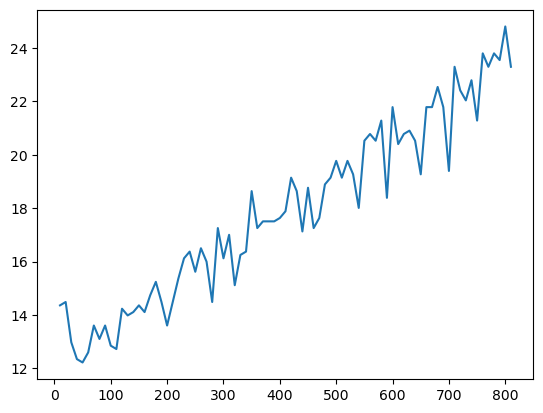

In [150]:
plt.plot(d.keys(),d.values())